In [1]:
%matplotlib inline

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

### 9.2 小米價值 200 萬人民幣的設計

#### 超橢圓方程式長這樣

$$\left| \dfrac{x}{a} \right|^n + \left| \dfrac{y}{b} \right|^n = 1$$

如果 $a=b=1$, 我們有:

$$|x|^n + |y|^n = 1$$

而 $n=2$ 時就是單位圓。

### 9.3 隱函數畫圖

#### meshgrid 作網格

In [2]:
x = np.array([1,2,3,4])
y = np.array([5,6,7,8])

X, Y = np.meshgrid(x,y)

In [3]:
Z = np.random.randint(1,3,(4,4))

#### 等高線畫圖

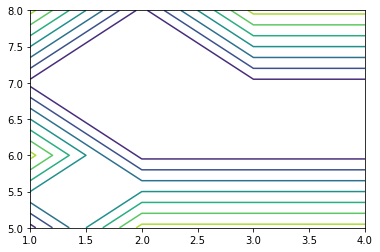

In [4]:
plt.contour(X,Y,Z)

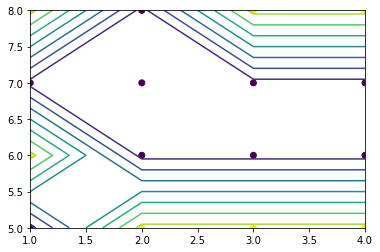

In [5]:
plt.contour(X,Y,Z)
plt.scatter(X.ravel(),Y.ravel(),c=Z.ravel())

#### 藝術感 fill 版等高線

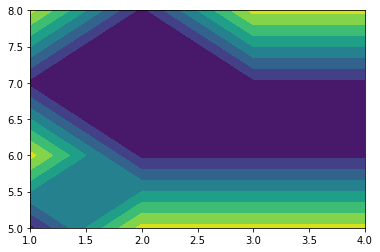

In [6]:
plt.contourf(X,Y,Z)

#### 3D 函數的繪圖

我們本來是要畫

$$f(x,y)=0$$

在平面的曲線, 但可以改成畫

$$Z = f(X,Y)$$

再找 $Z=0$ 的等高線。

我們的例子就是:

$$f(X, Y) = |X|^n + |Y|^n - 1 $$

In [7]:
x = np.linspace(-1.5, 1.5, 200)
y = np.linspace(-1.5, 1.5, 200)

X, Y = np.meshgrid(x,y)

In [8]:
n = 2

Z = np.abs(X)**n + np.abs(Y)**n - 1

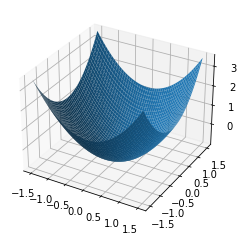

In [9]:
ax = plt.gca(projection='3d')

ax.plot_surface(X, Y, Z)

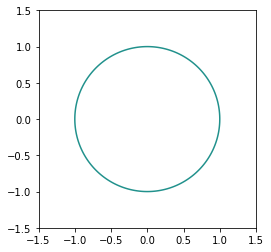

In [10]:
ax = plt.gca()
ax.set_aspect('equal')

plt.contour(X,Y,Z,0);

#### 寫成一個函式 superellipse 1.0

In [11]:
def superellipse(n=2):
    Z = np.abs(X)**n + np.abs(Y)**n - 1
    ax = plt.gca()
    ax.set_aspect('equal')

    plt.contour(X, Y, Z, 0)

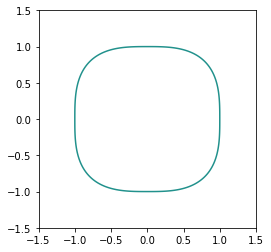

In [12]:
superellipse(3)

#### 做成互動

In [13]:
from ipywidgets import interact

In [14]:
interact(superellipse, n=(2, 100));

interactive(children=(IntSlider(value=2, description='n', min=2), Output()), _dom_classes=('widget-interact',)…

### 9.4 回到可愛的參數式

$$ x = |\cos(\theta)|^{\frac{2}{n}} \times \mathrm{sgn}(\cos(\theta))$$

$$ y = |\sin(\theta)|^{\frac{2}{n}} \times \mathrm{sgn}(\sin(\theta))$$

#### 判斷正負號

In [15]:
np.sign(-5)

-1

In [16]:
np.sign(87)

1

In [17]:
π = np.pi

In [18]:
θ = np.linspace(0, 2*π, 200)

In [19]:
n = 3

x = np.abs(np.cos(θ))**(2/n) * np.sign(np.cos(θ))
y = np.abs(np.sin(θ))**(2/n) * np.sign(np.sin(θ))

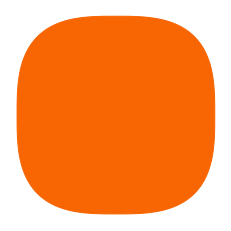

In [20]:
ax = plt.gca()
ax.set_aspect('equal')
plt.axis('off')

plt.fill(x, y, c='#F86503');

#### 寫成函數 superellipse 2.0、互動!

In [21]:
def superellipse(n=2):
    θ = np.linspace(0, 2*π, 200)

    x = np.abs(np.cos(θ))**(2/n) * np.sign(np.cos(θ))
    y = np.abs(np.sin(θ))**(2/n) * np.sign(np.sin(θ))

    ax = plt.gca()
    ax.set_aspect('equal')
    plt.axis('off')

    plt.fill(x, y, c='#F86503');

注意 $n$ 是浮點數也可以!

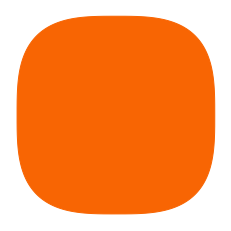

In [22]:
superellipse(π)

In [23]:
interact(superellipse, n=(2.,100.));

interactive(children=(FloatSlider(value=2.0, description='n', min=2.0), Output()), _dom_classes=('widget-inter…

### 9.5 同時呈現好幾個圖

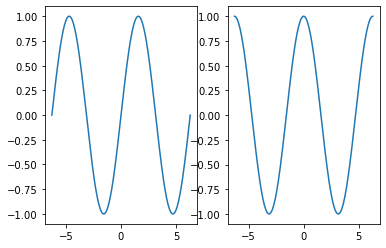

In [24]:
x = np.linspace(-2*π, 2*π, 200)

plt.subplot(121)
plt.plot(x, np.sin(x))

plt.subplot(122)
plt.plot(x, np.cos(x))

#### superellipse 3.0 顯示 $n$ 值

我們準備同時畫出 24 個超橢圓, 並顯示各別的 $n$ 值, 以便我們選出最好的!

In [25]:
def superellipse(n=2):
    θ = np.linspace(0, 2*π, 200)

    x = np.abs(np.cos(θ))**(2/n) * np.sign(np.cos(θ))
    y = np.abs(np.sin(θ))**(2/n) * np.sign(np.sin(θ))

    ax = plt.gca()
    ax.set_aspect('equal')
    plt.axis('off')
    ax.set_title(f'n={n:.1f}')

    plt.fill(x, y, c='#F86503');

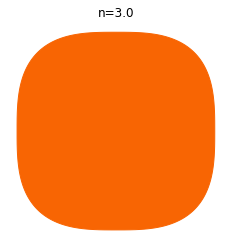

In [26]:
superellipse(3)

#### subplots 畫出 24 個超橢圓

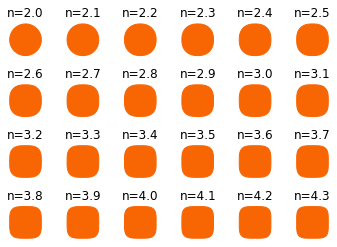

In [27]:
plt.subplots_adjust(hspace=0.75)


for i in range(1, 25):
    plt.subplot(4,6,i)
    superellipse(2 + (i-1)*0.1)